# Homework 2

- Play with dual numbers
- Reproduce this graph

![caption here](Images/Image_hw2.png "Title")

In [1]:
using SymEngine
import Zygote:gradient
using Plots

In [2]:
@vars x;
f = sin(x)
df = diff(f, x)
df = df(0.5)
println("The derivative value of sin(x) at x = 1/2 is ", df)

The derivative value of sin(x) at x = 1/2 is 0.877582561890373


## Forward, Central, and Backward Differentiation

In [3]:
fun(x) = sin(x)
h = 10 .^ collect(-18:0.1:1)

diff_forward(f, x, h) = (f(x+h) - f(x))/h;
diff_central(f, x, h) = (f(x+h/2) - f(x-h/2))/h;
diff_backward(f, x, h) = (f(x) - f(x-h))/h;
diff_complex(f, x, h) = imag(f(x+h*im))/h

diff_complex (generic function with 1 method)

In [4]:
forward = Any[]
central = Any[]
backward = Any[]
complex = Any[]

for _h in h
    append!(forward, abs(diff_forward(fun, 0.5, _h) - df))
    append!(central, abs(diff_central(fun, 0.5, _h) - df))
    append!(backward, abs(diff_backward(fun, 0.5, _h) - df))
    if abs(diff_complex(fun, 0.5, _h) - df) <= eps(Float64)
        append!(complex, eps(Float64)*1.5)
    else
        append!(complex, abs(diff_complex(fun, 0.5, _h) - df))
    end
end

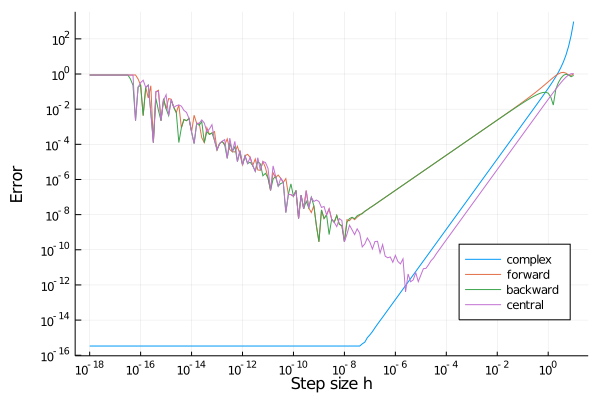

In [5]:
x_ticks = 10 .^ collect(-18:2.:1)
y_ticks = 10 .^ collect(-16:2.:3)
plot(h, complex, xaxis=:log, yaxis=:log, label="complex", legend=:bottomright, xticks=x_ticks, yticks=y_ticks)
plot!(h, forward, xaxis=:log, yaxis=:log, label="forward")
plot!(h, backward, label="backward")
plot!(h, central, label="central")
xlabel!("Step size h")
ylabel!("Error")

## Dual Numbers

In [9]:
struct D <: Number  # D is a function-derivative pair
    f::Tuple{Float64,Float64}
end